Purpose: Try running pyComBat to reduce variability from BioProject and/or tissue, then see what the PCA looks like in these cases.<br>
Author: Anna Pardo<br>
Date initiated: Feb. 20, 2024

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from combat.pycombat import pycombat

In [2]:
# load TPM matrix
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [3]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [4]:
# set Sample as index and drop BioProject and Treatment columns
ttpm = tpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1)
ttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [5]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [6]:
# find how many zero-variance genes were eliminated
len(ttpm.columns)-len(vttpm.columns)

9

In [6]:
# log-transform TPM
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.227968,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.148026,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.236712,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435


In [7]:
# Load metadata
md = pd.read_csv("../../data/metadata_corrected_14-Feb-2024.csv",sep=",",header="infer")
md.head()

,Unnamed: 0,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [8]:
# reset index & merge with metadata
comtpm = vttpm_log.reset_index().rename(columns={"index":"Sample"})
comtpm.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,...,0.227968,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000
1,SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,...,0.148026,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000
2,SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,...,0.000000,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231
3,SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933
4,SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,...,0.236712,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435


In [9]:
# merge with metadata
mdcomtpm = comtpm.merge(md[["Sample","BioProject","Tissue"]],how="inner",on="Sample")
mdcomtpm.set_index("Sample",inplace=True)
mdcomtpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,BioProject,Tissue
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000,PRJNA637522,Leaf
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000,PRJNA637522,Leaf
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231,PRJNA637522,Leaf
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933,PRJNA637522,Leaf
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435,PRJNA637522,Leaf


In [10]:
# correct by BioProject
dflist = []
for i in range(len(mdcomtpm["BioProject"].unique())):
    t = mdcomtpm["BioProject"].unique()[i]
    dflist.append(mdcomtpm[mdcomtpm["BioProject"]==t])
dflist[0].head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,BioProject,Tissue
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000,PRJNA637522,Leaf
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000,PRJNA637522,Leaf
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231,PRJNA637522,Leaf
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933,PRJNA637522,Leaf
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435,PRJNA637522,Leaf


In [10]:
# generate a list of dataframes each with a single tissue
dflist = []
for i in range(len(mdcomtpm["Tissue"].unique())):
    t = mdcomtpm["Tissue"].unique()[i]
    dflist.append(mdcomtpm[mdcomtpm["Tissue"]==t])
dflist[0].head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,BioProject,Tissue
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000,PRJNA637522,Leaf
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000,PRJNA637522,Leaf
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231,PRJNA637522,Leaf
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933,PRJNA637522,Leaf
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435,PRJNA637522,Leaf


In [11]:
# for each dataframe in dflist: remove the columns not beginning with Zm, then transpose the dataframe
dl2 = []
for df in dflist:
    filtered_columns = [col for col in df.columns if col.startswith("Zm")]
    df2 = df[filtered_columns]
    dl2.append(df2.transpose())

In [12]:
# generate the batch variable: Tissue only
batch = []
for j in range(len(dl2)):
    batch.extend([j for _ in range(len(dl2[j].columns))])

In [13]:
# go back to vttpm_log and re-transpose it
vtpm_log = vttpm_log.transpose()
vtpm_log.head()

Sample,SRR11933261,SRR11933272,SRR11933250,SRR11933029,SRR11933040,SRR11932822,SRR11932811,SRR11933230,SRR11932879,SRR11933475,...,Ms71D3C,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D
Zm00001eb000010,3.760627,4.109013,3.326079,3.201844,3.507319,5.264161,5.354941,4.985365,4.608395,4.019939,...,1.27328,1.547709,1.279532,3.403289,1.155814,1.98776,1.481069,2.402443,2.149165,2.169362
Zm00001eb000020,1.731651,2.039269,1.994391,1.759475,1.925657,4.833336,4.550943,4.680800,3.103594,2.296733,...,0.00000,1.485257,0.000000,0.000000,1.548514,0.64318,0.234395,0.832973,0.464142,0.549750
Zm00001eb000050,0.060075,0.490802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383775,0.416658,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Zm00001eb000060,3.800400,3.038092,2.032962,1.447213,1.189432,4.931234,4.532830,4.534223,3.975189,3.898004,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Zm00001eb000070,2.644723,1.537277,1.842599,1.549133,2.254362,3.001007,3.102715,2.649520,1.668005,1.491079,...,0.00000,0.537870,0.000000,1.013190,0.000000,0.00000,0.000000,0.000000,1.411628,0.806190


In [14]:
# run pyComBat for BioProject
bpcor_tpm = pycombat(vtpm_log,batch)

Found 39 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/leviathan22/.local/lib/python3.8/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


In [14]:
# run pyComBat for tissue
tiscor_tpm = pycombat(vtpm_log,batch)

Found 12 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/leviathan22/.local/lib/python3.8/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


In [15]:
# save BioProject-correted data
bpcor_tpm.to_csv("../../data/BioProject_pyComBat_TPM_29-Feb-2024.tsv",sep="\t",header=True,index=False)

In [15]:
# save tissue-corrected data
tiscor_tpm.to_csv("../../data/tissue_corrected_tpm.tsv",sep="\t",header=True,index=False)

In [16]:
# run PCA for tissue-corrected data
# transpose corrected tpm (actually log tpm) df
tct = tiscor_tpm.transpose()

In [17]:
# transpose BioProject-corrected log tpm df
bct = bpcor_tpm.transpose()

In [18]:
# run PCA and generate dataframe with PCs
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(bct)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [18]:
# find the explained variance ratio: tissue-corrected
pca.explained_variance_ratio_

array([0.25668893, 0.13931571])

In [19]:
# find the explained variance ratio: BioProject-corrected
pca.explained_variance_ratio_

array([0.16102907, 0.14062374])

In [20]:
# reset index (after running PCA)
bct.reset_index(inplace=True)
bct.rename(columns={"index":"Sample"},inplace=True)

In [19]:
# reset index (after running PCA)
tct.reset_index(inplace=True)
tct.rename(columns={"index":"Sample"},inplace=True)

In [21]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
bctm = bct.merge(md,how="inner")
bctm.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,SRR11933261,3.594095,2.519998,-0.007294,3.905214,1.951832,3.598633,0.449177,0.114911,0.941737,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,SRR11933272,3.894440,2.732825,0.381698,3.249370,1.059086,1.839096,0.248810,0.114911,1.555088,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,SRR11933250,3.219469,2.701776,-0.061548,2.384618,1.305216,4.078129,0.079220,0.114911,1.385320,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,SRR11933029,3.112365,2.539248,-0.061548,1.880675,1.068644,4.326093,0.079220,0.114911,1.237862,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,SRR11933040,3.375717,2.654222,-0.061548,1.658896,1.637151,4.333856,0.224072,0.114911,1.547974,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [20]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
tctm = tct.merge(md,how="inner")
tctm.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,SRR11933261,3.636876,1.442219,0.035074,3.436729,2.444437,3.446793,0.430887,-0.024221,1.143632,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,SRR11933272,3.966738,1.714539,0.433435,2.715774,1.391821,1.747208,0.189903,-0.024221,1.788145,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,SRR11933250,3.225434,1.674811,-0.020487,1.765170,1.682026,3.909953,-0.014064,-0.024221,1.609752,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,SRR11933029,3.107804,1.466850,-0.020487,1.211196,1.403090,4.149468,-0.014064,-0.024221,1.454802,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,SRR11933040,3.397037,1.613964,-0.020487,0.967399,2.073403,4.156966,0.160151,-0.024221,1.780670,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [22]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,bctm[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,-45.081514,-53.435650,PRJNA637522,238,Drought,13 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
1,26.697241,-41.375347,PRJNA637522,238,Drought,9 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
2,-14.172960,-55.326917,PRJNA637522,268,Drought,9 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
3,14.217106,-55.595690,PRJNA637522,268,Control,9 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
4,-16.683410,-49.316264,PRJNA637522,268,Drought,13 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN


In [21]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,tctm[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

,PC1,PC2,BioProject,Genotype,Treatment,Time_after_treatment,Concentration,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media
0,-28.195872,-95.562224,PRJNA637522,238,Drought,13 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
1,-68.938059,-36.891070,PRJNA637522,238,Drought,9 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
2,-40.945373,-76.480396,PRJNA637522,268,Drought,9 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
3,-68.348730,-58.199357,PRJNA637522,268,Control,9 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN
4,-42.753408,-72.812215,PRJNA637522,268,Drought,13 days,NaN,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN


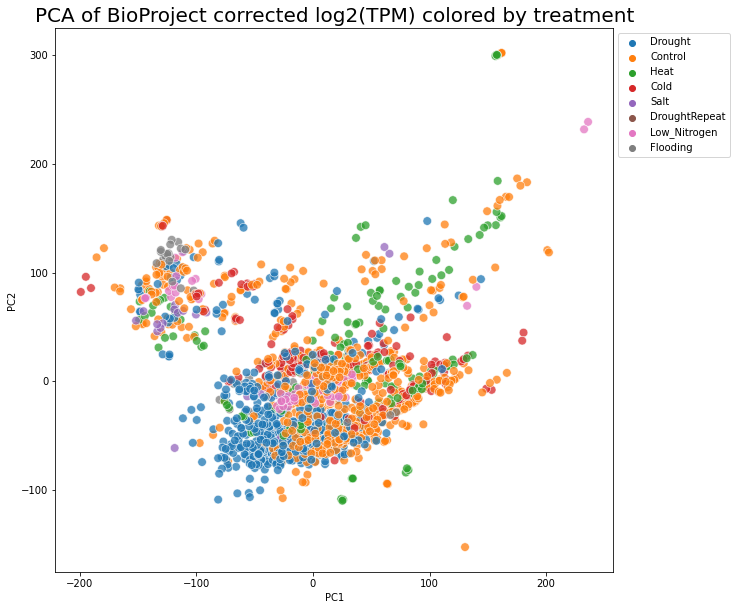

In [23]:
# plot the data: to start with, color by treatment
## note this is with correction via pyComBat for BioProject
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab10",s=75,alpha=0.75)
plt.title("PCA of BioProject corrected log2(TPM) colored by treatment",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

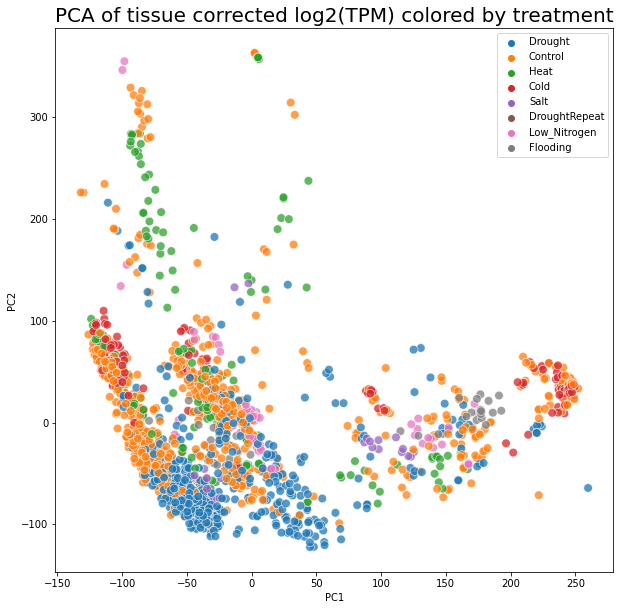

In [22]:
# plot the data: to start with, color by treatment
## note this is with correction via pyComBat for tissue
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab10",s=75,alpha=0.75)
plt.title("PCA of tissue corrected log2(TPM) colored by treatment",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

In [24]:
# plot two overlapping scatterplots with different colormaps to accommodate all 40 BioProjects
# generate a list containing half of the BioProjects

half_bioprojects = []
count = 0
while count < 20:
    half_bioprojects.append(plotdf["BioProject"].unique()[count])
    count += 1
half_bioprojects

['PRJNA637522',
 'PRJNA506720',
 'PRJNA556806',
 'PRJNA545969',
 'PRJNA244661',
 'PRJNA414300',
 'PRJNA378714',
 'PRJNA747925',
 'PRJNA520822',
 'PRJNA548548',
 'PRJNA290180',
 'PRJNA759701',
 'PRJNA689935',
 'PRJNA210356',
 'PRJNA339768',
 'PRJNA172724',
 'PRJNA291919',
 'PRJNA420600',
 'PRJNA436973',
 'PRJNA304223']

In [25]:
# generate dataframes each containing half the BioProjects
plotdf1 = plotdf[plotdf["BioProject"].isin(half_bioprojects)]
plotdf2 = plotdf[~plotdf["BioProject"].isin(half_bioprojects)]

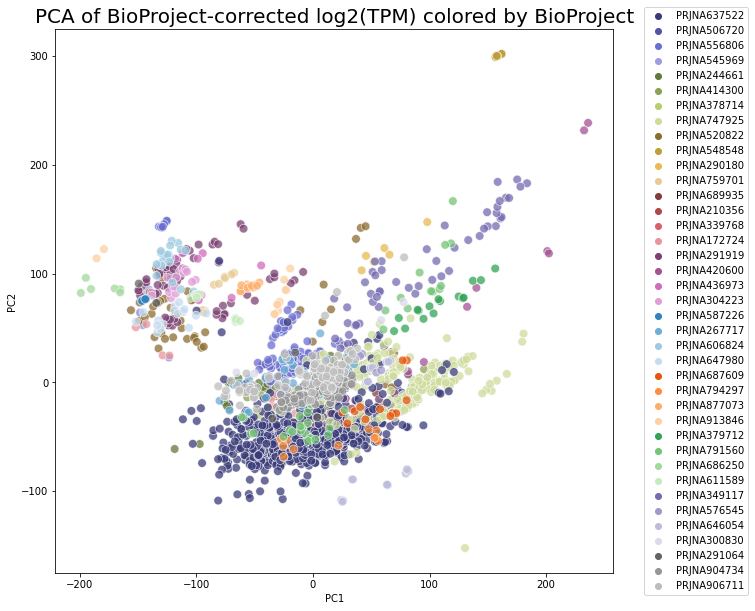

In [26]:
# plot data by BioProject
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of BioProject-corrected log2(TPM) colored by BioProject",fontsize=20)
plt.legend(bbox_to_anchor=(1.25,1.05))

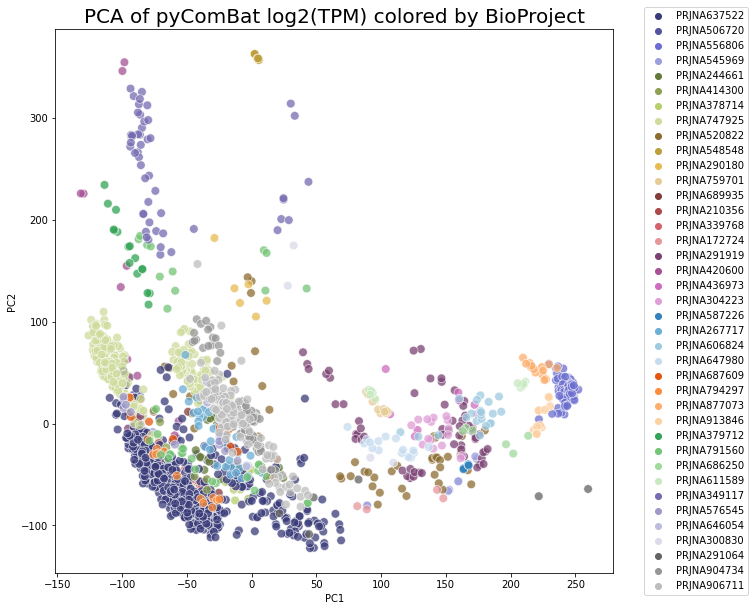

In [25]:
# plot data by BioProject
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf1["PC1"],y=plotdf1["PC2"],hue=plotdf1["BioProject"],palette="tab20b",s=75,alpha=0.75)
sns.scatterplot(x=plotdf2["PC1"],y=plotdf2["PC2"],hue=plotdf2["BioProject"],palette="tab20c",s=75,alpha=0.75)
plt.title("PCA of pyComBat log2(TPM) colored by BioProject",fontsize=20)
plt.legend(bbox_to_anchor=(1.25,1.05))

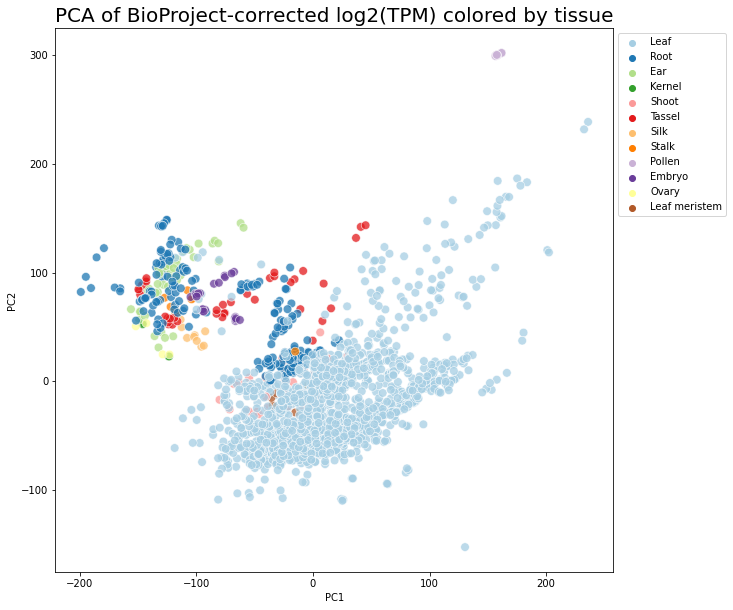

In [27]:
# plot data by tissue
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="Paired",s=75,alpha=0.75)
plt.title("PCA of BioProject-corrected log2(TPM) colored by tissue",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

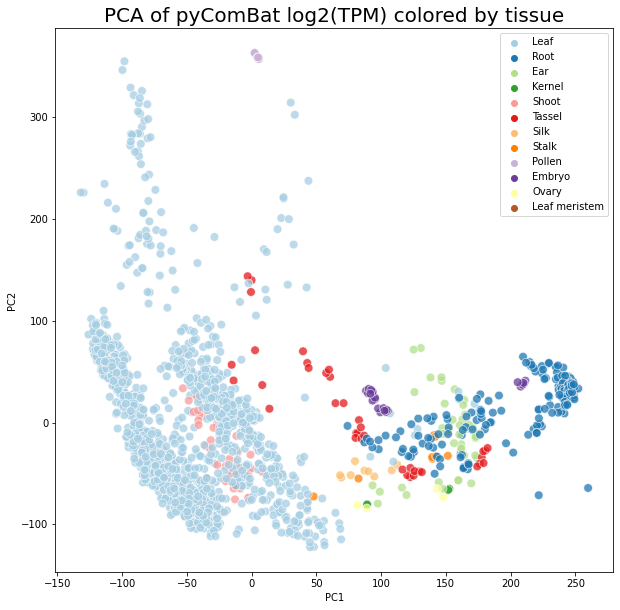

In [26]:
# plot data by tissue
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Tissue"],palette="Paired",s=75,alpha=0.75)
plt.title("PCA of pyComBat log2(TPM) colored by tissue",fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

In [2]:
# load corrected data
tiscor_tpm = pd.read_csv("../../data/tissue_corrected_tpm.tsv",sep="\t",header="infer")

In [10]:
tiscor_tpm.head()

,SRR11933261,SRR11933272,SRR11933250,SRR11933029,SRR11933040,SRR11932822,SRR11932811,SRR11933230,SRR11932879,SRR11933475,...,Ms71D3C,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D
0,3.636876,3.966738,3.225434,3.107804,3.397037,5.060466,5.146419,4.796493,4.439568,3.882400,...,2.232377,2.741011,2.201605,4.749849,2.053159,3.051391,1.696920,3.520856,3.019472,3.059452
1,1.442219,1.714539,1.674811,1.466850,1.613964,4.187994,3.938004,4.052961,2.656736,1.942459,...,1.202781,3.998593,1.418897,1.418897,4.485952,2.692808,1.636116,3.031709,2.171775,2.371370
2,0.035074,0.433435,-0.020487,-0.020487,-0.020487,-0.020487,-0.020487,-0.020487,0.334449,0.364862,...,0.266479,0.266479,0.254650,0.254650,0.254650,0.254650,0.256307,0.256307,0.256307,0.256307
3,3.436729,2.715774,1.765170,1.211196,0.967399,4.506218,4.129426,4.130743,3.602036,3.529038,...,2.599805,2.599805,3.067714,3.067714,3.067714,3.067714,2.325244,2.325244,2.325244,2.325244
4,2.444437,1.391821,1.682026,1.403090,2.073403,2.783081,2.879753,2.448996,1.516076,1.347910,...,0.711910,1.522789,0.660913,2.109306,0.660913,0.660913,0.431973,0.431973,1.968217,1.309332


In [3]:
# correct data by both tissue and BioProject
tctpm = tiscor_tpm.transpose()

In [4]:
# reset index & merge with metadata
tctpm_reset = tctpm.reset_index().rename(columns={"index":"Sample"})

In [7]:
# merge with metadata
tctpm_md = tctpm_reset.merge(md[["Sample","BioProject","Tissue"]],how="inner",on="Sample")
tctpm_md.set_index("Sample",inplace=True)
tctpm_md.head()

,0,1,2,3,4,5,6,7,8,9,...,38987,38988,38989,38990,38991,38992,38993,38994,BioProject,Tissue
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.636876,1.442219,0.035074,3.436729,2.444437,3.446793,0.430887,-0.024221,1.143632,-0.014996,...,-0.001042,0.000797,-0.005271,0.314043,-0.001898,-0.008368,-0.001044,-0.031033,PRJNA637522,Leaf
SRR11933272,3.966738,1.714539,0.433435,2.715774,1.391821,1.747208,0.189903,-0.024221,1.788145,-0.014996,...,-0.001042,0.000797,-0.005271,2.707677,-0.001898,-0.008368,-0.001044,-0.031033,PRJNA637522,Leaf
SRR11933250,3.225434,1.674811,-0.020487,1.765170,1.682026,3.909953,-0.014064,-0.024221,1.609752,-0.014996,...,-0.001042,0.000797,-0.005271,0.421154,-0.001898,0.283326,-0.001044,1.044169,PRJNA637522,Leaf
SRR11933029,3.107804,1.466850,-0.020487,1.211196,1.403090,4.149468,-0.014064,-0.024221,1.454802,-0.014996,...,-0.001042,0.000797,-0.005271,-0.050198,-0.001898,-0.008368,-0.001044,1.136754,PRJNA637522,Leaf
SRR11933040,3.397037,1.613964,-0.020487,0.967399,2.073403,4.156966,0.160151,-0.024221,1.780670,-0.014996,...,-0.001042,0.000797,-0.005271,3.142076,-0.001898,-0.008368,-0.001044,1.606242,PRJNA637522,Leaf


In [8]:
# generate a list of dataframes each with a single BioProject
dflist = []
for i in range(len(tctpm_md["BioProject"].unique())):
    t = tctpm_md["BioProject"].unique()[i]
    dflist.append(tctpm_md[tctpm_md["BioProject"]==t])
dflist[0].head()

,0,1,2,3,4,5,6,7,8,9,...,38987,38988,38989,38990,38991,38992,38993,38994,BioProject,Tissue
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.636876,1.442219,0.035074,3.436729,2.444437,3.446793,0.430887,-0.024221,1.143632,-0.014996,...,-0.001042,0.000797,-0.005271,0.314043,-0.001898,-0.008368,-0.001044,-0.031033,PRJNA637522,Leaf
SRR11933272,3.966738,1.714539,0.433435,2.715774,1.391821,1.747208,0.189903,-0.024221,1.788145,-0.014996,...,-0.001042,0.000797,-0.005271,2.707677,-0.001898,-0.008368,-0.001044,-0.031033,PRJNA637522,Leaf
SRR11933250,3.225434,1.674811,-0.020487,1.765170,1.682026,3.909953,-0.014064,-0.024221,1.609752,-0.014996,...,-0.001042,0.000797,-0.005271,0.421154,-0.001898,0.283326,-0.001044,1.044169,PRJNA637522,Leaf
SRR11933029,3.107804,1.466850,-0.020487,1.211196,1.403090,4.149468,-0.014064,-0.024221,1.454802,-0.014996,...,-0.001042,0.000797,-0.005271,-0.050198,-0.001898,-0.008368,-0.001044,1.136754,PRJNA637522,Leaf
SRR11933040,3.397037,1.613964,-0.020487,0.967399,2.073403,4.156966,0.160151,-0.024221,1.780670,-0.014996,...,-0.001042,0.000797,-0.005271,3.142076,-0.001898,-0.008368,-0.001044,1.606242,PRJNA637522,Leaf


In [9]:
# for each dataframe in dflist: remove the columns not beginning with Zm, then transpose the dataframe
dl2 = []
for df in dflist:
    filtered_columns = [col for col in df.columns if col.startswith("Zm")]
    df2 = df[filtered_columns]
    dl2.append(df2.transpose())

AttributeError: 'int' object has no attribute 'startswith'

In [21]:
# generate the batch variable: BioProject only
batch = []
for j in range(len(dl2)):
    batch.extend([j for _ in range(len(dl2[j].columns))])

In [ ]:
# run pyComBat for BioProject on previously tissue-corrected data
tisbpcor = pycombat(tiscor_tpm,batch)

Found 39 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.


In [ ]:
# transpose corrected tpm (actually log tpm) df
ct = tisbpcor.transpose()
ct.head()

In [ ]:
# run PCA and generate dataframe with PCs
pca = PCA(n_components=2)
real_PCs = pca.fit_transform(ct)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1','PC2'])

In [ ]:
# find the explained variance ratio
pca.explained_variance_ratio_

In [ ]:
# reset index (after running PCA)
ct.reset_index(inplace=True)
ct.rename(columns={"index":"Sample"},inplace=True)
ct.head()

In [ ]:
# merge with metadata
## note this has to maintain the sample order of vttpm_log, otherwise when we concatenate it with the PC df everything will be
## incorrectly matched up
ctm = ct.merge(md,how="inner")
ctm.head()

In [ ]:
# append metadata to PCA df
plotdf = pd.concat([real_PCs_df,ctm[["BioProject","Genotype","Treatment","Time_after_treatment","Concentration",
                                                 "Developmental_stage","Tissue","Day_length_hours","Day_temp_C","Night_temp_C",
                                                 "Relative humidity (%)","Light (umol/m2/s)","Growth Env.","Media"]]],axis=1)
plotdf.head()

In [ ]:
# plot the data: to start with, color by treatment
## note this is with correction via pyComBat
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=plotdf["PC1"],y=plotdf["PC2"],hue=plotdf["Treatment"],palette="tab20",s=75,alpha=0.75)
plt.title("PCA of pyComBat corrected log2(TPM) colored by treatment",fontsize=20)
plt.legend(bbox_to_anchor=(1.02,1))